# Simulation 17: NS3 Simulation

TJ Kim
4/28/21

Make a single set of plans for all baselines and heuristics using the following parameters:
- 20 users, 10 servers, 10 ts
- Jobs last entire duration
- Resources, limited

Mean speed = 1, var = 0.3


In [1]:
from IPython.core.debugger import set_trace

# Import Generic Classes
import numpy as np
import copy
import pickle
import random
import csv

# Import All Custom Classes
import os, sys
sys.path.append(os.path.pardir+"/classes")
sys.path.append(os.path.pardir+"/solvers")
sys.path.append(os.path.pardir+"/one_mobility")
sys.path.append(os.path.curdir + "/sim_store/sim17")
sys.path.append(os.path.pardir+"/crawdad_mobility")


from Server import *
from User import *
from Link import *
from Job import *
from Migration_Plans import *
from Cost_Recordings import *

from load_crawdad_usr import *
from sim17_setting import *

# Import Solver Classes
from Optim_PlanGenerator import *
from SeqGreedy_PlanGenerator import *
from Myopic_PlanGenerator import *
from Naive_PlanGenerator import *

### Run Simulation across 1 trials for the groups

Heuristics - Sequential Greedy and Batched

Baselines - Naive and Myopic

Save plans for sending to Youngbin.

In [2]:
# Load Crawdad data
# Load All 12 users and trim their info
db_names = []
for i in range(1,5):
    db_names += ['LifeMap_GS'+str(i)+'.db']

db = []
for name in db_names:
    name = '/home/tkim/CMU/MEC_research/crawdad_mobility/' + name
    df,trace = load_usr(name)
    db += [trace]

In [3]:
speed = 1
var = 0.3

while True:
    # Make Batch Prob
    
    try:
        # Make Users
        users, servers, links, jobs, sim_param = simulation_setting(db, speed, var)
        
        # Manually Adjust server locs
        print("batch_prob...")
        Batch_prob = SeqGreedy_PlanGenerator(users, servers, links, jobs, sim_param)
        Batch_plan = Migration_Plans(users,jobs,sim_param)
        Batch_plan.from_seq_greedy(Batch_prob)
        Batch_cost_stores = [Cost_Recordings(Batch_plan)]
        print("done!")
    except:
        continue


    # Make SG Prob
    # Set Refresh to false for SG
    refresh_rate = [0,0]
    refresh = False

    for j in range(len(jobs)):
        jobs[j].info_from_usr(users[j],refresh_rate,refresh)

    print("SG prob...")
    SG_prob = SeqGreedy_PlanGenerator(users, servers, links, jobs, sim_param)
    SG_plan = Migration_Plans(users,jobs,sim_param)
    SG_plan.from_seq_greedy(SG_prob)
    SG_cost_stores = [Cost_Recordings(SG_plan)]
    print("done!")

    # Make Naive Prob
    print("Naive prob...")
    Naive_prob = Naive_PlanGenerator(users, servers, links, jobs, sim_param)
    Naive_plan = Migration_Plans(users,jobs,sim_param)
    Naive_plan.from_seq_greedy(Naive_prob)
    Naive_cost_stores = [Cost_Recordings(Naive_plan)]
    print("done!")

    # Make Myopic Prob
    print("Myopic prob...")
    Myopic_prob = Myopic_PlanGenerator(users, servers, links, jobs, sim_param)
    Myopic_plan = Migration_Plans(users,jobs,sim_param)
    Myopic_plan.from_seq_greedy(Myopic_prob)
    Myopic_cost_stores = [Cost_Recordings(Myopic_plan)]
    print("done!")
    
    break

batch_prob...
Struck Placement Resource (j,s,t): 14 2 0
Struck Placement Resource (j,s,t): 14 2 1
Struck Placement Resource (j,s,t): 14 2 2
Struck Placement Resource (j,s,t): 15 3 0
Struck Placement Resource (j,s,t): 15 3 1
Struck Placement Resource (j,s,t): 15 3 2
Struck Placement Resource (j,s,t): 16 2 0
Struck Placement Resource (j,s,t): 16 2 1
Struck Placement Resource (j,s,t): 16 2 2
Struck Placement Resource (j,s,t): 17 2 0
Struck Placement Resource (j,s,t): 17 2 1
Struck Placement Resource (j,s,t): 17 2 2
Struck Placement Resource (j,s,t): 16 2 3
Struck Placement Resource (j,s,t): 10 8 5
Struck Placement Resource (j,s,t): 12 8 5
Struck Placement Resource (j,s,t): 12 8 6
Struck Placement Resource (j,s,t): 14 8 5
Struck Placement Resource (j,s,t): 14 8 4
not enough resources, simulation broken
batch_prob...
Struck Placement Resource (j,s,t): 6 2 0
Struck Placement Resource (j,s,t): 9 3 0
Struck Placement Resource (j,s,t): 13 2 0
Struck Placement Resource (j,s,t): 13 2 1
Struck Pla

### Run Cost Plots for Each Plan to check if "good enough"

We don't want to send a bad set of plans for the simulation.

In [4]:
# Log the costs of interest
num_trials = len(Batch_cost_stores)

SG_total_sum = np.zeros(num_trials)
SG_placement_sum = np.zeros(num_trials)
SG_bw_sum = np.zeros(num_trials)
SG_UE_sum = np.zeros(num_trials)

Batch_total_sum = np.zeros(num_trials)
Batch_placement_sum = np.zeros(num_trials)
Batch_bw_sum = np.zeros(num_trials)
Batch_UE_sum = np.zeros(num_trials)

Myopic_total_sum = np.zeros(num_trials)
Myopic_placement_sum = np.zeros(num_trials)
Myopic_bw_sum = np.zeros(num_trials)
Myopic_UE_sum = np.zeros(num_trials)

Naive_total_sum = np.zeros(num_trials)
Naive_placement_sum = np.zeros(num_trials)
Naive_bw_sum = np.zeros(num_trials)
Naive_UE_sum = np.zeros(num_trials)

for i in range(num_trials):

    SG_total_sum[i] += SG_cost_stores[i].all_cost_cumulative["total_cost"][-1]
    SG_placement_sum[i] += SG_cost_stores[i].all_cost_cumulative["placement_cost"][-1]
    SG_bw_sum[i] += SG_cost_stores[i].all_cost_cumulative["srv_bw_cost"][-1]
    SG_bw_sum[i] += SG_cost_stores[i].all_cost_cumulative["mig_bw_cost"][-1]
    SG_UE_sum[i] += SG_cost_stores[i].all_cost_cumulative["thruput_cost"][-1]
    SG_UE_sum[i] += SG_cost_stores[i].all_cost_cumulative["latency_cost"][-1]

    Batch_total_sum[i] += Batch_cost_stores[i].all_cost_cumulative["total_cost"][-1]
    Batch_placement_sum[i] += Batch_cost_stores[i].all_cost_cumulative["placement_cost"][-1]
    Batch_bw_sum[i] += Batch_cost_stores[i].all_cost_cumulative["srv_bw_cost"][-1]
    Batch_bw_sum[i] += Batch_cost_stores[i].all_cost_cumulative["mig_bw_cost"][-1]
    Batch_UE_sum[i] += Batch_cost_stores[i].all_cost_cumulative["thruput_cost"][-1]
    Batch_UE_sum[i] += Batch_cost_stores[i].all_cost_cumulative["latency_cost"][-1]
    
    Myopic_total_sum[i] += Myopic_cost_stores[i].all_cost_cumulative["total_cost"][-1]
    Myopic_placement_sum[i] += Myopic_cost_stores[i].all_cost_cumulative["placement_cost"][-1]
    Myopic_bw_sum[i] += Myopic_cost_stores[i].all_cost_cumulative["srv_bw_cost"][-1]
    Myopic_bw_sum[i] += Myopic_cost_stores[i].all_cost_cumulative["mig_bw_cost"][-1]
    Myopic_UE_sum[i] += Myopic_cost_stores[i].all_cost_cumulative["thruput_cost"][-1]
    Myopic_UE_sum[i] += Myopic_cost_stores[i].all_cost_cumulative["latency_cost"][-1]
    
    Naive_total_sum[i] += Naive_cost_stores[i].all_cost_cumulative["total_cost"][-1]
    Naive_placement_sum[i] += Naive_cost_stores[i].all_cost_cumulative["placement_cost"][-1]
    Naive_bw_sum[i] += Naive_cost_stores[i].all_cost_cumulative["srv_bw_cost"][-1]
    Naive_bw_sum[i] += Naive_cost_stores[i].all_cost_cumulative["mig_bw_cost"][-1]
    Naive_UE_sum[i] += Naive_cost_stores[i].all_cost_cumulative["thruput_cost"][-1]
    Naive_UE_sum[i] += Naive_cost_stores[i].all_cost_cumulative["latency_cost"][-1]

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


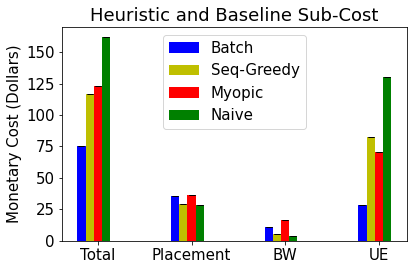

In [5]:
# Plot the plot
import matplotlib
import matplotlib.pyplot as plt

# Set Font Size Limitations
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}

matplotlib.rc('font', **font)

# Set Labels
labels = ['Total', 'Placement', 'BW', 'UE']

# Obtain Values to Plot
SG_means = [np.mean(SG_total_sum), np.mean(SG_placement_sum), np.mean(SG_bw_sum), np.mean(SG_UE_sum)]
Batch_means = [np.mean(Batch_total_sum), np.mean(Batch_placement_sum), np.mean(Batch_bw_sum), np.mean(Batch_UE_sum)]
Myopic_means = [np.mean(Myopic_total_sum), np.mean(Myopic_placement_sum), np.mean(Myopic_bw_sum), np.mean(Myopic_UE_sum)]
Naive_means = [np.mean(Naive_total_sum), np.mean(Naive_placement_sum), np.mean(Naive_bw_sum), np.mean(Naive_UE_sum)]

SG_var = [np.std(SG_total_sum), np.std(SG_placement_sum), np.std(SG_bw_sum), np.std(SG_UE_sum)]
Batch_var = [np.std(Batch_total_sum), np.std(Batch_placement_sum), np.std(Batch_bw_sum), np.std(Batch_UE_sum)]
Myopic_var = [np.std(Myopic_total_sum), np.std(Myopic_placement_sum), np.std(Myopic_bw_sum), np.std(Myopic_UE_sum)]
Naive_var = [np.std(Naive_total_sum), np.std(Naive_placement_sum), np.std(Naive_bw_sum), np.std(Naive_UE_sum)]


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x = x - width/2, height =  Batch_means, yerr = Batch_var,
                capsize = 3, width = width/4, label='Batch', color='b')
rects2 = ax.bar(x = x - width/4, height = SG_means, yerr = SG_var, 
                capsize = 3, width = width/4, label='Seq-Greedy', color = 'y')
rects3 = ax.bar(x = x, height =  Myopic_means, yerr = Myopic_var,
                capsize = 3, width = width/4, label='Myopic', color='r')
rects4 = ax.bar(x = x + width/4, height = Naive_means, yerr = Naive_var, 
                capsize = 3, width = width/4, label='Naive', color = 'g')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Monetary Cost (Dollars)')
ax.set_title('Heuristic and Baseline Sub-Cost')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Set Y axis to zero
plt.ylim(0,)

fig.tight_layout()

plt.show()

### Save Parameters as CSV Files 

Save users, servers, links, and each plan as a CSV file in the sim storage folder.

In [6]:
# Absolute Location
num_users = len(users)

header = ""
locs = np.zeros((sim_param.time_steps,2*num_users))

# Edit the users
for u in range(num_users):
    x_string = "x - user%d,"%(u)
    y_string = "y - user%d,"%(u)
    
    header += x_string
    header += y_string
    
    locs[:,(2*u):(2*u)+2] = users[u].true_path.T

# Print the CSV File
np.savetxt(os.path.curdir + "/sim_store/sim17" +"/csv_saves/user_locs.csv", 
           locs, delimiter=",",header=header[0:-1],comments='')

In [7]:
# Voronoi Location
num_users = len(users)

header = ""
locs = np.zeros((sim_param.time_steps,num_users))

# Edit the users
for u in range(num_users):
    x_string = "user%d,"%(u)
    
    header += x_string    
    locs[:,u] = users[u].user_voronoi_true.T

# Print the CSV File
np.savetxt(os.path.curdir + "/sim_store/sim17" +"/csv_saves/user_voronoi.csv", 
           locs, delimiter=",",header=header[0:-1],comments='')

In [8]:
# Server Locs
# Absolute Location of Server
num_svr = len(servers)

header = ""
locs = np.zeros((sim_param.time_steps,2*num_svr))

# Edit the users
for s in range(num_svr):
    x_string = "x - server%d,"%(s)
    y_string = "y - server%d,"%(s)
    
    header += x_string
    header += y_string
    
    locs[:,(2*s):(2*s)+2] = servers[s].locs

# Print the CSV File
np.savetxt(os.path.curdir + "/sim_store/sim17"+"/csv_saves/server_locs.csv", 
           locs, delimiter=",",header=header[0:-1],comments='')

In [9]:
# Links
# Print the CSV File
np.savetxt(os.path.curdir + "/sim_store/sim17"+"/csv_saves/server_link_flag.csv",
           links.valid_links, delimiter=",",comments='')

In [10]:
# Save SG Plan
# Absolute Location
num_jobs = len(jobs)

header = []

# Edit the users
for j in range(num_jobs):
    s1 = "source (host) svr - user%d"%(j)
    s2 = "mig dest svr - user%d"%(j)
    s3 = "proportion migration"
    s4 = "mig Gb transfered - user%d"%(j)
    s5 = "mig path - user%d"%(j)
    s6 = "enb svr - user%d"%(j)
    s7 = "Mbps to enb - user%d"%(j)
    s8 = "to enb path - user%d"%(j)
    
    header += ([s1]+[s2]+[s3]+[s4]+[s5]+[s6]+[s7]+[s8])
    
# Make all rows to print into CSV
all_rows = []
for t in range(sim_param.time_steps):
    curr_row = []
    for j in range(num_jobs):
        # The components of the rows
        source = int(SG_plan.mig_plan_dict[j]["source_server"][t])
        dest = int(SG_plan.mig_plan_dict[j]["dest_server"][t])
        mig_rate = int(SG_plan.mig_plan_dict[j]["mig_rate"][t])
        mbps = mig_rate * jobs[j].migration_rsrc
        
        # Helper
        num_path = int(SG_plan.mig_plan_dict[j]["mig_link_id"][t])
        
        # Processing Tuple if migration occuring
        sub_path = 0
        if mig_rate > 0:
            sub_path = links.get_subpath_sequential(source,dest,num_path)
            
        # user information
        usr_enb_svr = int(SG_plan.mig_plan_dict[j]["user_voronoi"][t])
        enb_rate = SG_plan.mig_plan_dict[j]["service_thruput"][t] * 1000
        enb_path = 0
        
        if enb_rate > 0:
            enb_numpath = 0
            enb_rate = 1
            enb_path = links.get_subpath_sequential(source,usr_enb_svr,enb_numpath)
        
        
        curr_row += ([str(source)]+[str(dest)]+[str(mig_rate)]+[str(mbps)]+[str(sub_path)]+[str(usr_enb_svr)]+[str(enb_rate)]+[str(enb_path)])
    
    all_rows += [curr_row]

with open(os.path.curdir + "/sim_store/sim17"+'/csv_saves/plan1_SG.csv','w') as out:
    csv_out=csv.writer(out)
    csv_out.writerow(header)
    for row in all_rows:
        csv_out.writerow(row)

In [11]:
# Batch Plan
# Absolute Location
num_jobs = len(jobs)

header = []

# Edit the users
for j in range(num_jobs):
    s1 = "source (host) svr - user%d"%(j)
    s2 = "mig dest svr - user%d"%(j)
    s3 = "proportion migration"
    s4 = "mig Gb transfered - user%d"%(j)
    s5 = "mig path - user%d"%(j)
    s6 = "enb svr - user%d"%(j)
    s7 = "Mbps to enb - user%d"%(j)
    s8 = "to enb path - user%d"%(j)
    
    header += ([s1]+[s2]+[s3]+[s4]+[s5]+[s6]+[s7]+[s8])
    
# Make all rows to print into CSV
all_rows = []
for t in range(sim_param.time_steps):
    curr_row = []
    for j in range(num_jobs):
        # The components of the rows
        source = int(Batch_plan.mig_plan_dict[j]["source_server"][t])
        dest = int(Batch_plan.mig_plan_dict[j]["dest_server"][t])
        mig_rate = int(Batch_plan.mig_plan_dict[j]["mig_rate"][t])
        mbps = mig_rate * jobs[j].migration_rsrc
        
        # Helper
        num_path = int(Batch_plan.mig_plan_dict[j]["mig_link_id"][t])
        
        # Processing Tuple if migration occuring
        sub_path = 0
        if mig_rate > 0:
            sub_path = links.get_subpath_sequential(source,dest,num_path)
        
        # user information
        usr_enb_svr = int(Batch_plan.mig_plan_dict[j]["user_voronoi"][t])
        enb_rate = Batch_plan.mig_plan_dict[j]["service_thruput"][t]* 1000
        enb_path = 0
        
        if enb_rate > 0:
            enb_numpath = 0
            enb_rate = 1
            enb_path = links.get_subpath_sequential(source,usr_enb_svr,enb_numpath)
        
        
        curr_row += ([str(source)]+[str(dest)]+[str(mig_rate)]+[str(mbps)]+[str(sub_path)]+[str(usr_enb_svr)]+[str(enb_rate)]+[str(enb_path)])
    
    
    all_rows += [curr_row]

with open(os.path.curdir + "/sim_store/sim17"+'/csv_saves/plan2_batch.csv','w') as out:
    csv_out=csv.writer(out)
    csv_out.writerow(header)
    for row in all_rows:
        csv_out.writerow(row)

In [12]:
# Myopic
# Absolute Location
num_jobs = len(jobs)

header = []

# Edit the users
for j in range(num_jobs):
    s1 = "source (host) svr - user%d"%(j)
    s2 = "mig dest svr - user%d"%(j)
    s3 = "proportion migration"
    s4 = "mig Gb transfered - user%d"%(j)
    s5 = "mig path - user%d"%(j)
    s6 = "enb svr - user%d"%(j)
    s7 = "Mbps to enb - user%d"%(j)
    s8 = "to enb path - user%d"%(j)
    
    header += ([s1]+[s2]+[s3]+[s4]+[s5]+[s6]+[s7]+[s8])
    
# Make all rows to print into CSV
all_rows = []
for t in range(sim_param.time_steps):
    curr_row = []
    for j in range(num_jobs):
        # The components of the rows
        source = int(Myopic_plan.mig_plan_dict[j]["source_server"][t])
        dest = int(Myopic_plan.mig_plan_dict[j]["dest_server"][t])
        mig_rate = int(Myopic_plan.mig_plan_dict[j]["mig_rate"][t])
        mbps = mig_rate * jobs[j].migration_rsrc
        
        # Helper
        num_path = int(Myopic_plan.mig_plan_dict[j]["mig_link_id"][t])
        
        # Processing Tuple if migration occuring
        sub_path = 0
        if mig_rate > 0:
            sub_path = links.get_subpath_sequential(source,dest,num_path)
        
        # user information
        usr_enb_svr = int(Myopic_plan.mig_plan_dict[j]["user_voronoi"][t])
        enb_rate = Myopic_plan.mig_plan_dict[j]["service_thruput"][t]* 1000
        enb_path = 0
        
        if enb_rate > 0:
            enb_numpath = 0
            enb_rate = 1            
            enb_path = links.get_subpath_sequential(source,usr_enb_svr,enb_numpath)
        
        
        curr_row += ([str(source)]+[str(dest)]+[str(mig_rate)]+[str(mbps)]+[str(sub_path)]+[str(usr_enb_svr)]+[str(enb_rate)]+[str(enb_path)])
        
    all_rows += [curr_row]

with open(os.path.curdir + "/sim_store/sim17"+'/csv_saves/plan3_myopic.csv','w') as out:
    csv_out=csv.writer(out)
    csv_out.writerow(header)
    for row in all_rows:
        csv_out.writerow(row)

In [13]:
# Naive
# Absolute Location
num_jobs = len(jobs)

header = []

# Edit the users
for j in range(num_jobs):
    s1 = "source (host) svr - user%d"%(j)
    s2 = "mig dest svr - user%d"%(j)
    s3 = "proportion migration"
    s4 = "mig Gb transfered - user%d"%(j)
    s5 = "mig path - user%d"%(j)
    s6 = "enb svr - user%d"%(j)
    s7 = "Mbps to enb - user%d"%(j)
    s8 = "to enb path - user%d"%(j)
    
    header += ([s1]+[s2]+[s3]+[s4]+[s5]+[s6]+[s7]+[s8])
    
# Make all rows to print into CSV
all_rows = []
for t in range(sim_param.time_steps):
    curr_row = []
    for j in range(num_jobs):
        # The components of the rows
        source = int(Naive_plan.mig_plan_dict[j]["source_server"][t])
        dest = int(Naive_plan.mig_plan_dict[j]["dest_server"][t])
        mig_rate = int(Naive_plan.mig_plan_dict[j]["mig_rate"][t])
        mbps = mig_rate * jobs[j].migration_rsrc
        
        # Helper
        num_path = int(Naive_plan.mig_plan_dict[j]["mig_link_id"][t])
        
        # Processing Tuple if migration occuring
        sub_path = 0
        if mig_rate > 0:
            sub_path = links.get_subpath_sequential(source,dest,num_path)
        
        # user information
        usr_enb_svr = int(Naive_plan.mig_plan_dict[j]["user_voronoi"][t])
        enb_rate = Naive_plan.mig_plan_dict[j]["service_thruput"][t] * 1000
        enb_path = 0
        
        if enb_rate > 0:
            enb_numpath = 0
            enb_rate = 1
            enb_path = links.get_subpath_sequential(source,usr_enb_svr,enb_numpath)
        
        
        curr_row += ([str(source)]+[str(dest)]+[str(mig_rate)]+[str(mbps)]+[str(sub_path)]+[str(usr_enb_svr)]+[str(enb_rate)]+[str(enb_path)])
        
    all_rows += [curr_row]

with open(os.path.curdir + "/sim_store/sim17"+'/csv_saves/plan4_naive.csv','w') as out:
    csv_out=csv.writer(out)
    csv_out.writerow(header)
    for row in all_rows:
        csv_out.writerow(row)

### Pickle Relevant Files for Storage for Later Use

In [14]:
import pickle

store_dict = {}
store_dict['users'] = users
store_dict['jobs'] = jobs
store_dict['servers'] = servers
store_dict['links'] = links
store_dict['SG_plan'] = SG_plan
store_dict['Batch_plan'] = Batch_plan
store_dict['Naive_plan'] = Naive_plan
store_dict['Myopic_plan'] = Myopic_plan

pickle.dump(store_dict, open( os.path.curdir + "/sim_store/sim17/"+"sim_store.p", "wb" ) )



In [15]:
import pickle
store_dict = pickle.load(open(os.path.curdir + "/sim_store/sim17/"+"sim_store.p","rb"))
users = store_dict['users']
jobs = store_dict['jobs']
servers = store_dict['servers']
links = store_dict['links']
SG_plan = store_dict['SG_plan']
Batch_plan = store_dict['Batch_plan']
Naive_plan = store_dict['Naive_plan']
Myopic_plan = store_dict['Myopic_plan']